In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512382 sha256=e7e2f53f376101c5669b2cc808be6c68e9d72a30b3c93884d7840a50d903fd55
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [6]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [7]:
kospi = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/KOSPI2022.csv")
kospi

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,2998.320068,3010.770020,2591.530029,2663.340088,2663.340088,10916900
1,2022-02-01,2706.340088,2788.270020,2642.629883,2699.179932,2699.179932,10111500
2,2022-03-01,2698.310059,2765.199951,2605.810059,2757.649902,2757.649902,14388900
3,2022-04-01,2745.850098,2769.179932,2615.500000,2695.050049,2695.050049,22014500
4,2022-05-01,2669.209961,2702.100098,2546.800049,2685.899902,2685.899902,16851600
5,2022-06-01,2670.739990,2681.510010,2306.479980,2332.639893,2332.639893,12006600
6,2022-07-01,2342.919922,2463.050049,2276.629883,2451.500000,2451.500000,7950200
7,2022-08-01,2444.050049,2546.350098,2417.010010,2472.050049,2472.050049,9760600
8,2022-09-01,2443.000000,2453.949951,2134.770020,2155.489990,2155.489990,9370100
9,2022-10-01,2189.510010,2295.510010,2162.870117,2293.610107,2293.610107,11769900


In [8]:
# KOSPI를 DATE, CLOSE로 전처리

kospi = kospi[['Date', 'Close']]
kospi

,Date,Close
0,2022-01-01,2663.340088
1,2022-02-01,2699.179932
2,2022-03-01,2757.649902
3,2022-04-01,2695.050049
4,2022-05-01,2685.899902
5,2022-06-01,2332.639893
6,2022-07-01,2451.500000
7,2022-08-01,2472.050049
8,2022-09-01,2155.489990
9,2022-10-01,2293.610107


In [9]:
# GDP데이터

gdp_2022 = pd.DataFrame({
    'Date' : ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
    'GDP' : [512012.9, 512012.9, 512012.9, 544239.8, 544239.8, 544239.8, 548892.5, 548892.5, 548892.5, 556628.7, 556628.7, 556628.7]
})
gdp_2022

,Date,GDP
0,01,512012.9
1,02,512012.9
2,03,512012.9
3,04,544239.8
4,05,544239.8
5,06,544239.8
6,07,548892.5
7,08,548892.5
8,09,548892.5
9,10,556628.7


In [10]:
con_pri = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/2022소비자물가지수.csv")
con_pri

,Unnamed: 0,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212
0,consumer prices,3.6,3.7,4.1,4.8,5.4,6.0,6.3,5.7,5.6,5.7,5.0,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
con_pri = con_pri.iloc[0, :].to_numpy()

In [12]:
con_pri = con_pri[1:]

In [13]:
# consumer prices numpy array

con_pri = con_pri.reshape(-1, 1)

In [14]:
# gdp, kospi numpy array

gdp_arr = gdp_2022.iloc[:, 1].to_numpy().reshape(-1, 1)
kospi_arr = kospi.iloc[:, 1].to_numpy().reshape(-1, 1)

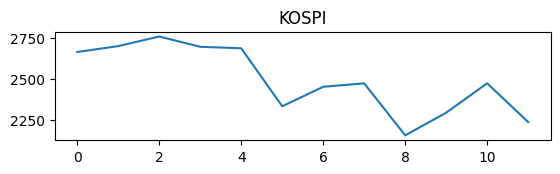

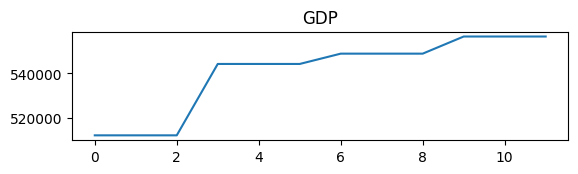

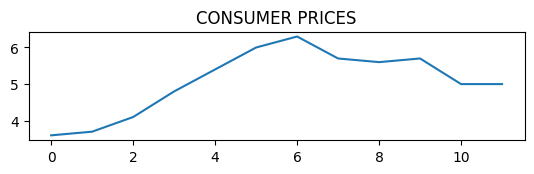

In [15]:
# 시각화

import matplotlib.pyplot as plt

plt.subplot(3, 1, 1)
plt.plot(np.arange(len(kospi_arr)), kospi_arr)
plt.title("KOSPI")
plt.show()

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(gdp_arr)), gdp_arr)
plt.title("GDP")
plt.show()

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(con_pri)), con_pri)
plt.title("CONSUMER PRICES")
plt.show()

In [16]:
# Normalization -> min - max scale

kospi_max = np.max(kospi_arr)
kospi_min = np.min(kospi_arr)

gdp_max = np.max(gdp_arr)
gdp_min = np.min(gdp_arr)

con_max = np.max(con_pri)
con_min = np.min(con_pri)

for i in range(len(kospi_arr)) :
  kospi_arr[i] = (kospi_arr[i] - kospi_min) / (kospi_max - kospi_min)

for i in range(len(gdp_arr)) :
  gdp_arr[i] = (gdp_arr[i] - gdp_min) / (gdp_max - gdp_min)

for i in range(len(con_pri)) :
  con_pri[i] = (con_pri[i] - con_min) / (con_max - con_min)

print('-----------Normalization KOSPI-----------')
print(kospi_arr)
print('\n')
print('-----------Normalization GDP-----------')
print(gdp_arr)
print('\n')
print('-----------Normalization CONSUMER PRICES-----------')
print(con_pri)

-----------Normalization KOSPI-----------
[[0.84338078]
 [0.9028996 ]
 [1.        ]
 [0.89604115]
 [0.88084561]
 [0.29419079]
 [0.4915804 ]
 [0.52570763]
 [0.        ]
 [0.22937448]
 [0.52650473]
 [0.13436615]]


-----------Normalization GDP-----------
[[0.        ]
 [0.        ]
 [0.        ]
 [0.72232034]
 [0.72232034]
 [0.72232034]
 [0.82660403]
 [0.82660403]
 [0.82660403]
 [1.        ]
 [1.        ]
 [1.        ]]


-----------Normalization CONSUMER PRICES-----------
[[0.0]
 [0.03703703703703708]
 [0.18518518518518504]
 [0.44444444444444436]
 [0.6666666666666669]
 [0.888888888888889]
 [1.0]
 [0.7777777777777779]
 [0.7407407407407407]
 [0.7777777777777779]
 [0.5185185185185185]
 [0.5185185185185185]]


In [17]:
# DTW 계산

gdp_distance, gdp_path = fastdtw(kospi_arr, gdp_arr, dist = euclidean)

print("DTW Distance between the two time series: {}".format(gdp_distance))
print("DTW Path: {}".format(gdp_path))

DTW Distance between the two time series: 7.07893469144936
DTW Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11)]


In [18]:
con_distance, con_path = fastdtw(kospi_arr, con_pri, dist = euclidean)

print("DTW Distance between the two time series: {}".format(con_distance))
print("DTW Path: {}".format(con_path))

DTW Distance between the two time series: 4.717273430787537
DTW Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (2, 6), (3, 7), (4, 8), (4, 9), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (10, 10), (11, 11)]


In [19]:
# 각각의 비율 계산

kospi_ratio = 0
gdp_ratio = gdp_distance / (gdp_distance + con_distance)
con_ratio = con_distance / (gdp_distance + con_distance)

In [20]:
# weight

kospi_weight = 1 - kospi_ratio
gdp_weight = 1 - gdp_ratio
con_weight = 1 - con_ratio

In [26]:
result = []

for i in range(len(kospi_arr)) :
  result.append(kospi_arr[i] * kospi_weight + gdp_arr[i] * gdp_weight + con_pri[i] * con_weight)

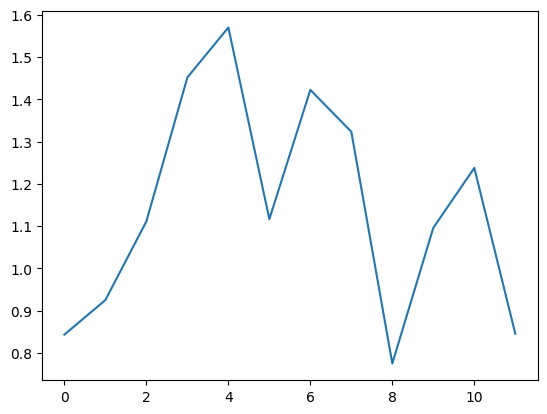

In [29]:
plt.plot(np.arange(len(result)), result)
plt.show()

In [30]:
def double_exponential_smoothing(data, alpha, beta) :
  level = data[0]
  trend = 0
  forecast = [data[0]]

  for t in range(1, len(data)) :
    prev_level = level
    prev_trend = trend

    level = alpha * data[t] + (1 - alpha) * (prev_level + prev_trend)
    trend = beta * (level - prev_level) + (1 - beta) * prev_trend

    forecast_t = level + trend
    forecast.append(forecast_t)

  return forecast

In [45]:
forecast = double_exponential_smoothing(result, 0.2, 0.2)

forecast_kospi = []

for i in range(len(forecast)) :
  forecast_kospi.append(forecast[i][0])

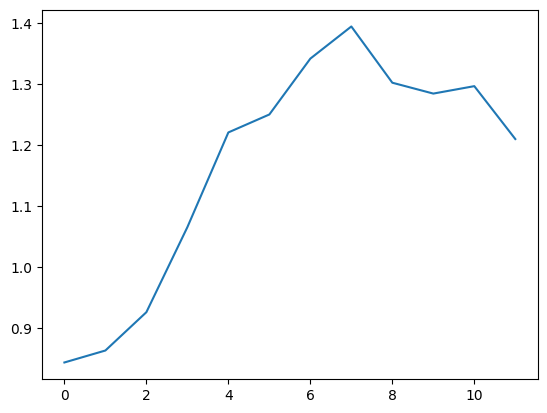

In [46]:
plt.plot(np.arange(len(forecast_kospi)), forecast_kospi)
plt.show()